In [38]:
# Imports
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
import pandas as pd
import numpy as np

In [2]:
# Fetch Data
mnist = fetch_openml('mnist_784', version=1)

In [3]:
pixel_features = mnist['data']
data_labels = mnist['target']

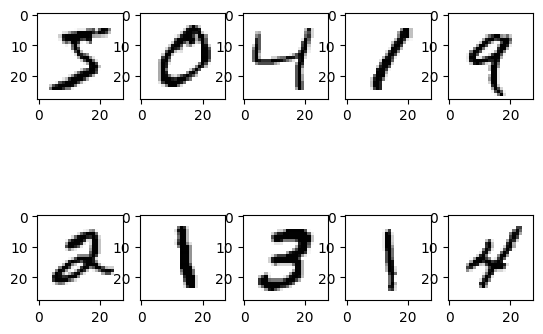

In [4]:
# View the Data
fig = plt.figure()
rows = 2
columns = 5
for i in range(rows * columns):
    fig.add_subplot(rows, columns, i + 1)
    # Each row corresponds to the pixels of the photo 
    # Need to reshape to a 28x28 array
    plt.imshow(pixel_features.iloc[i].to_numpy().reshape(28, 28), cmap='binary')

In [5]:
# Train, Holdout Set Split
x_train = pixel_features.sample(frac=0.90, random_state=13)
x_holdout = pixel_features.drop(x_train.index)
y_train = data_labels.iloc[x_train.index]
y_holdout = data_labels.drop(y_train.index)

In [10]:
# Methods to Train Models

def run_model_for_int(
    train_labels: pd.Series,
    target_int: int,
    cv: int = 5,
    scoring: str = 'accuracy'
):
    """
    Binary Classification model using Stochastic Gradient Descent.
    Train and cross validate a model on a dataset targeting a single class.
    """
    int_labels = (train_labels == str(target_int)) 
    # Train with Stochastic Gradient Descent
    temp_model = SGDClassifier(random_state=13)
    # model_score = np.mean(
    #     cross_val_score(
    #         estimator=temp_model,
    #         X=x_train,
    #         y=int_labels,
    #         cv=cv,
    #         scoring=scoring,
    #     )
    # )
    return temp_model
    # TODO: return model and run holdout test
    # TODO: Add Confusion matrices (test and holdout)
    return model_score
    

In [ ]:
# Train a Stochastic Gradient Descent model for each integer in MNIST
def get_int_labels(i: int, y_train):
    return (y_train == str(i))
    

def run_sgd_model(i: int, y_train, x_train):
    model_results = {}
    
    # Get target
    int_labels = get_int_labels(i=i, y_train=y_train)

    temp_model = SGDClassifier(random_state=13)
    # temp_model.fit(x_train, int_labels)
    model_results[str(i)] = {}
  
    temp_preds = cross_val_predict(
        temp_model, x_train, int_labels, cv=5
    )
    model_results[str(i)]['train_confusion_matrix'] = (
        confusion_matrix(int_labels, temp_preds)
    )
    model_results[str(i)]['train_precision'] = (
        precision_score(int_labels, temp_preds)
    )
    model_results[str(i)]['train_recall'] = (
        recall_score(int_labels, temp_preds)
    )
    model_results[str(i)]['train_f1'] = (
        f1_score(int_labels, temp_preds)
    )
    
    temp_scores = cross_val_predict(
        temp_model, x_train, int_labels, cv=5, method='decision_function'
    )
    
    temp_precisions, temp_recalls, temp_thresholds = precision_recall_curve(int_labels, temp_scores)
    
    plt.plot(temp_thresholds, temp_precisions[:-1], "b--", label='Precision')
    plt.plot(temp_thresholds, temp_recalls[:-1], "g-", label='Recall')
    plt.legend(loc='right')
    plt.show()
    
    false_positive_rates, true_positive_rates, thresholds = roc_curve(int_labels, temp_scores)
    plt.plot(false_positive_rates, true_positive_rates)
    plt.plot([0, 1], [0, 1], 'k--')
    
    return model_results

def run_random_forest_model(i: int, y_train, x_train):
    
    # Get target
    int_labels = get_int_labels(i=i, y_train=y_train)
    
    forest_model = RandomForestClassifier(random_state=13)
    
    temp_probs = cross_val_predict(forest_model, x_train, y_train, cv=5, method='predict_proba')
    
    temp_scores = temp_probs[:, 1] # pull out column 1 to get positive class probability
    false_positive_rates, true_positive_rates, thresholds = roc_curve(int_labels, temp_scores)
    
    plt.plot(false_positive_rates, true_positive_rates)
    plt.plot([0, 1], [0, 1], 'k--')
    
    
    

run_sgd_model(i=5, x_train=x_train, y_train=y_train)

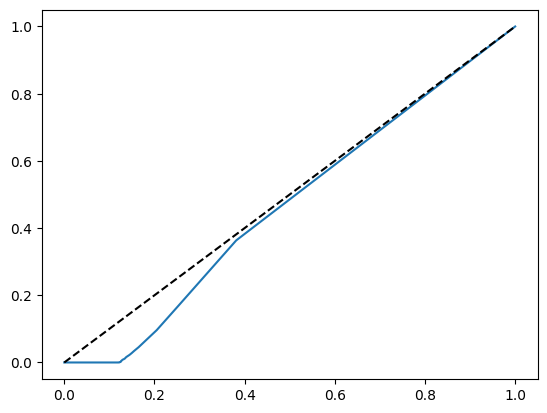

In [42]:
run_random_forest_model(i=5, x_train=x_train, y_train=y_train)